# **Togo-dapaong-Report**

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import matplotlib as mp
import streamlit as st
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

In [3]:
tog = pd.read_csv(r"C:\Users\Sima\Desktop\AIM-ML\Week-0\data\togo-dapaong_qc.csv")
tog.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
5,2021-10-25 00:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5,NaN
6,2021-10-25 00:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5,NaN
7,2021-10-25 00:08,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5,NaN
8,2021-10-25 00:09,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5,NaN
9,2021-10-25 00:10,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5,NaN


In [4]:
tog.shape

(525600, 19)

In [5]:
data_types = tog.dtypes
data_types

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [6]:
missing_values = tog.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
tog.duplicated().sum()

0

In [8]:
tog.duplicated().sum()

0

In [9]:
tog.drop('Comments', axis=1)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8


In [10]:
summary_stats = tog.describe()
print("Summary Statistics: \n", summary_stats)

Summary Statistics: 
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%        

In [11]:
average_ghi = tog['GHI'].mean()
average_tamb = tog['Tamb'].mean()
average_DNI = tog['DNI'].mean()
print(f"Average GHI: {average_ghi}")
print(f"Average Ambient Temperature: {average_tamb}")
print(f"Average DNI: {average_DNI}")

Average GHI: 230.55503976407917
Average Ambient Temperature: 27.75178805175039
Average DNI: 151.25846898782348


# **Descriptive Analysis**

## Convert Timestamp to datetime

In [12]:

tog['Timestamp'] = pd.to_datetime(tog['Timestamp'])

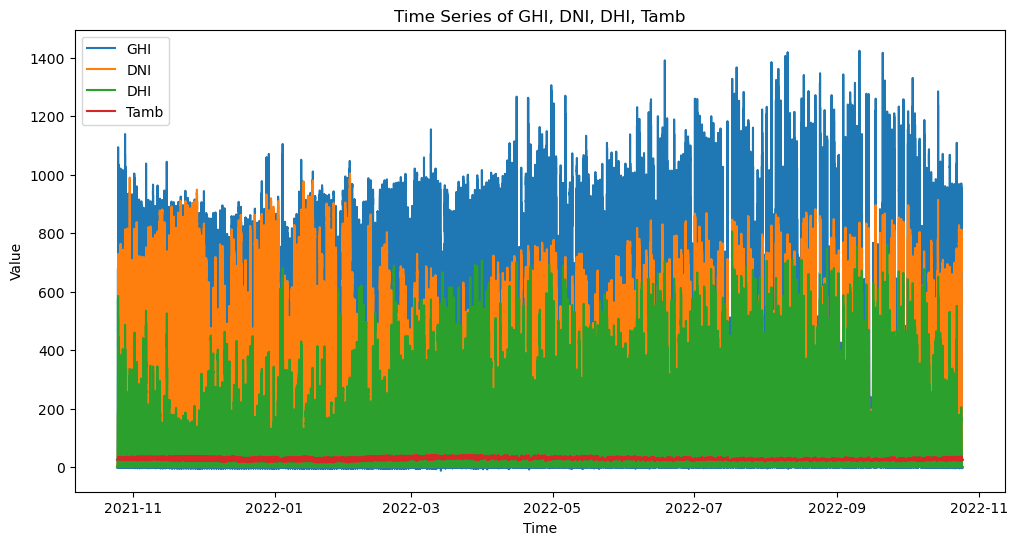

In [13]:
# Plot time series for GHI, DNI, DHI, Tamb
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.plot(tog['Timestamp'], SB['GHI'], label='GHI')
mp.pyplot.plot(tog['Timestamp'], SB['DNI'], label='DNI')
mp.pyplot.plot(tog['Timestamp'], SB['DHI'], label='DHI')
mp.pyplot.plot(tog['Timestamp'], SB['Tamb'], label='Tamb')
mp.pyplot.xlabel('Time')
mp.pyplot.ylabel('Value')
mp.pyplot.title('Time Series of GHI, DNI, DHI, Tamb')
mp.pyplot.legend()
mp.pyplot.show()

## Correlation heatmap

C:\Users\Sima\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


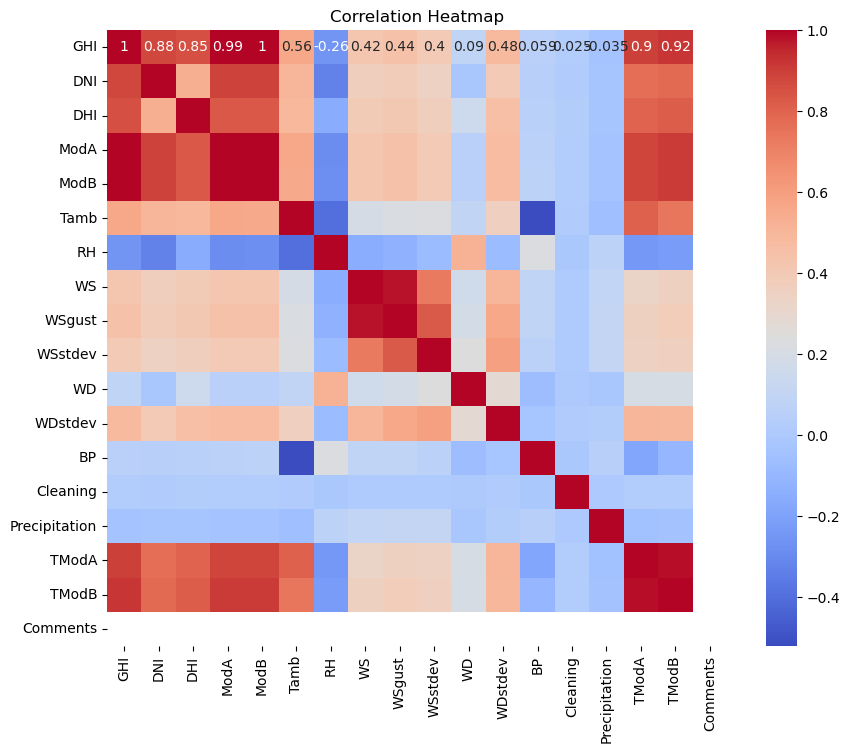

In [14]:
mp.pyplot.figure(figsize=(10, 8))
corr = tog.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
mp.pyplot.title('Correlation Heatmap')
mp.pyplot.show()

## Polar plot for wind speed and direction

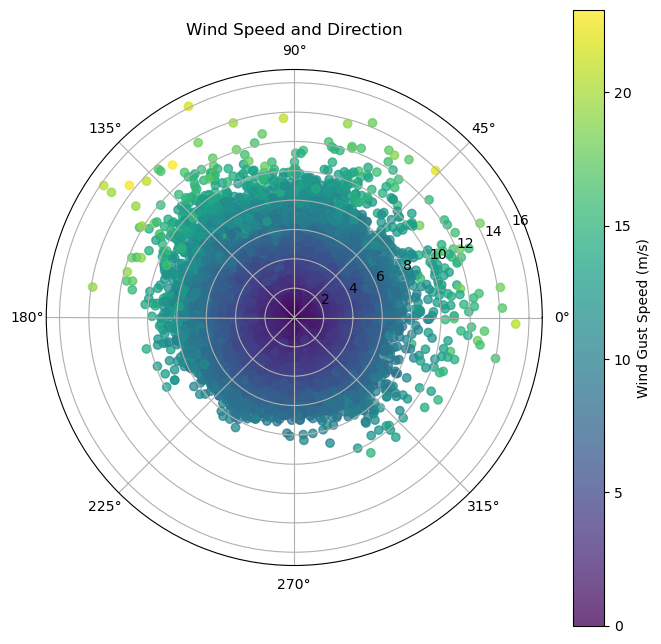

In [15]:


mp.pyplot.figure(figsize=(8, 8))
mp.pyplot.subplot(projection='polar')
# mp.pyplot.scatter(tog['WD'] * np.pi / 180, tog['WS'], c=tog['WSgust'], cmap=mp.viridis, alpha=0.75)
mp.pyplot.scatter(tog['WD'] * np.pi / 180, tog['WS'], c=tog['WSgust'], alpha=0.75)
mp.pyplot.colorbar(label='Wind Gust Speed (m/s)')
mp.pyplot.title('Wind Speed and Direction')
mp.pyplot.show()

## Create histograms for GHI, DNI, DHI, WS, and temperatures

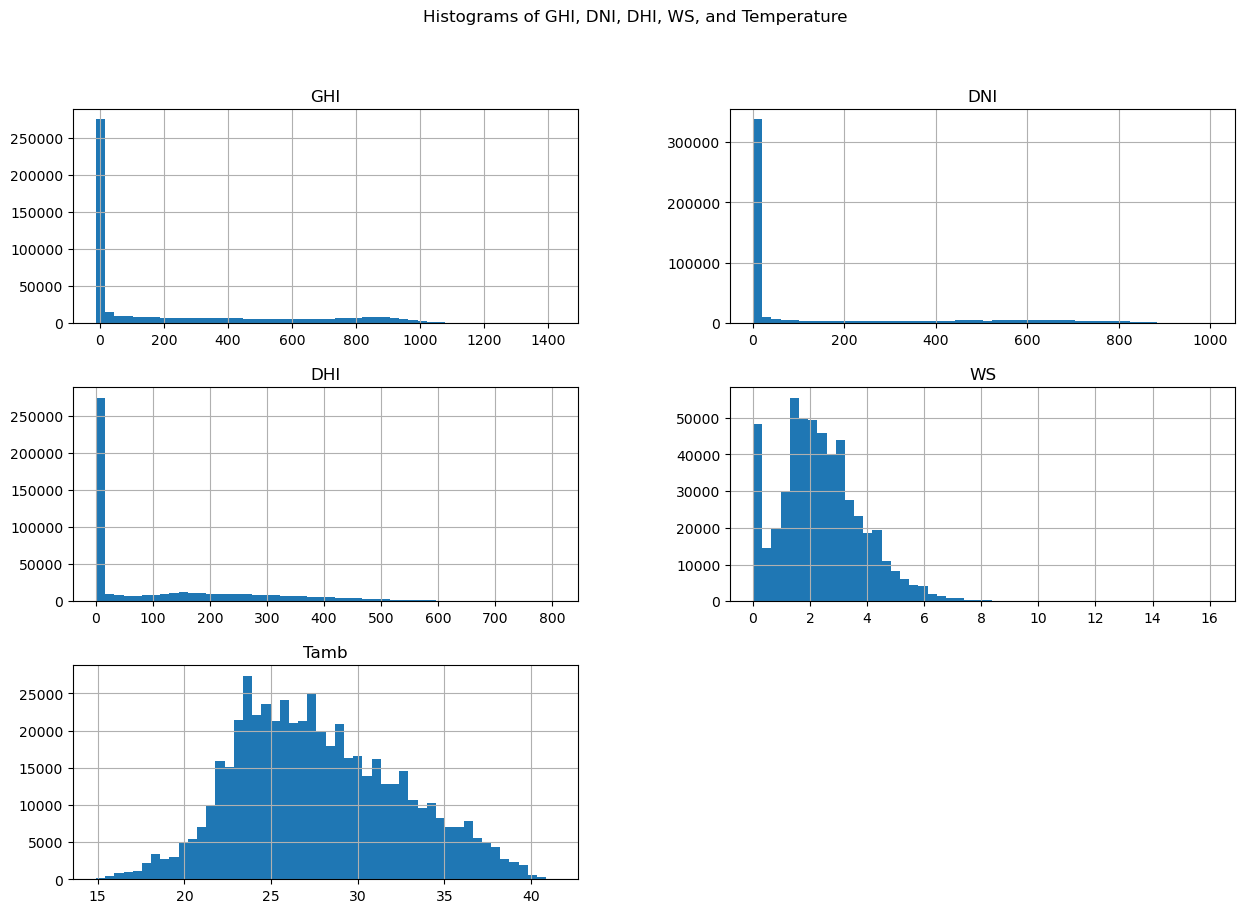

In [16]:

tog[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
mp.pyplot.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
mp.pyplot.show()

## Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size

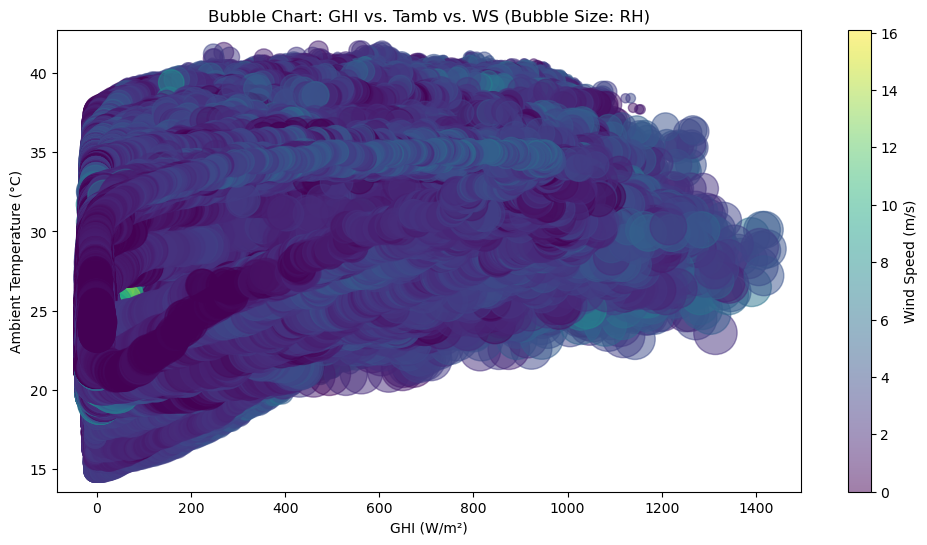

In [17]:

mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.scatter(tog['GHI'], tog['Tamb'], s=tog['RH']*10, alpha=0.5, c=tog['WS'], cmap='viridis')
mp.pyplot.colorbar(label='Wind Speed (m/s)')
mp.pyplot.xlabel('GHI (W/m²)')
mp.pyplot.ylabel('Ambient Temperature (°C)')
mp.pyplot.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
mp.pyplot.show()

## Drop rows with missing data
### print("Cleaned Data:\n", benin_data_cleaned.head())

In [18]:

tog_cleaned = tog.dropna(axis=1, how='all')  


## Drop columns with all missing values

In [19]:

tog_cleaned = tog.dropna(axis=1, how='all')
print("Cleaned Data (Columns):\n", tog_cleaned.head(10))

Cleaned Data (Columns):
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
5 2021-10-25 00:06:00 -1.2  0.0  0.0   0.0   0.0  24.9  93.9  1.2     1.4   
6 2021-10-25 00:07:00 -1.1  0.0  0.0   0.0   0.0  24.9  93.8  1.2     1.4   
7 2021-10-25 00:08:00 -1.1  0.0  0.0   0.0   0.0  24.9  93.7  1.1     1.4   
8 2021-10-25 00:09:00 -1.1  0.0  0.0   0.0   0.0  24.9  93.6  1.0     1.4   
9 2021-10-25 00:10:00 -1.1  0.0  0.0   0.0   0.0  24.9  93.4  0.9     1.4   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.4  227.6      1.1  977         0            0

## Perform a t-test on GHI values

In [20]:

from scipy import stats
t_stat, p_value = stats.ttest_ind(tog['GHI'], tog['DHI'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 230.75905945490217, p-value: 0.0


## Calculate the correlation matrix

In [21]:

correlation_matrix = tog.corr()
print(correlation_matrix)

               Timestamp       GHI       DNI       DHI      ModA      ModB  \
Timestamp       1.000000 -0.045848 -0.171813  0.055782 -0.081818 -0.074323   
GHI            -0.045848  1.000000  0.877293  0.852080  0.994964  0.995439   
DNI            -0.171813  0.877293  1.000000  0.532717  0.889702  0.889708   
DHI             0.055782  0.852080  0.532717  1.000000  0.833037  0.832648   
ModA           -0.081818  0.994964  0.889702  0.833037  1.000000  0.999564   
ModB           -0.074323  0.995439  0.889708  0.832648  0.999564  1.000000   
Tamb           -0.151706  0.562533  0.504499  0.489758  0.561114  0.556133   
RH              0.711630 -0.258077 -0.327887 -0.155016 -0.287038 -0.280072   
WS             -0.074907  0.421698  0.366667  0.390597  0.420344  0.421543   
WSgust         -0.050330  0.443923  0.384870  0.410531  0.442563  0.443570   
WSstdev         0.013985  0.399646  0.343437  0.367005  0.398559  0.398978   
WD              0.355868  0.089896 -0.017950  0.154095  0.057154

## Assuming 1440 minutes in a day

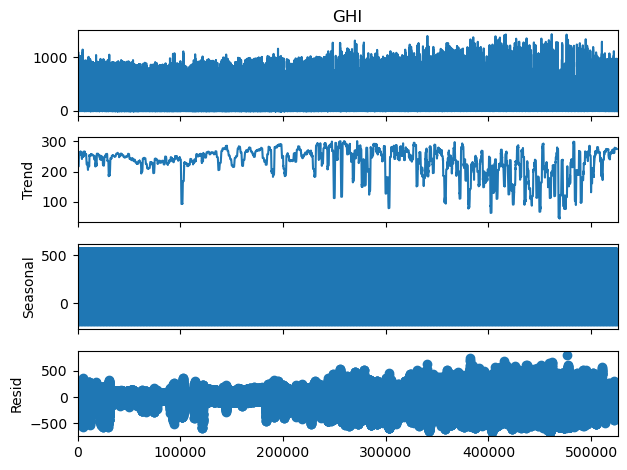

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(tog['GHI'], model='additive', period=1440)  
result.plot()
plt.show()

## Plotting Global Horizontal Irradiance (GHI) over time.

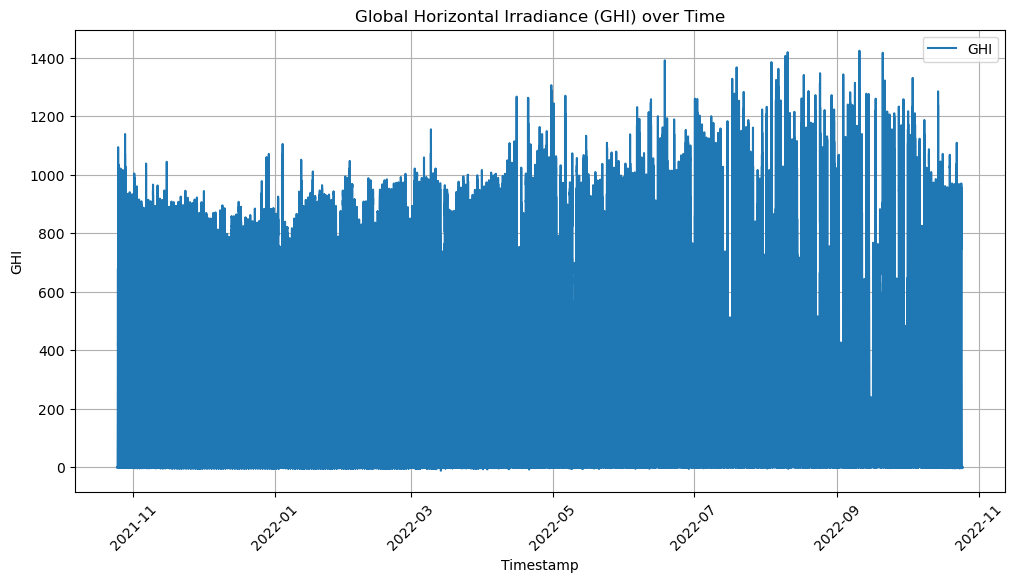

In [23]:


plt.figure(figsize=(12, 6))
plt.plot(tog['Timestamp'], tog['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance (GHI) over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Scatter-Plot:Showing the relationship between Global Horizontal Irradiance (GHI) and Direct Normal Irradiance (DNI)

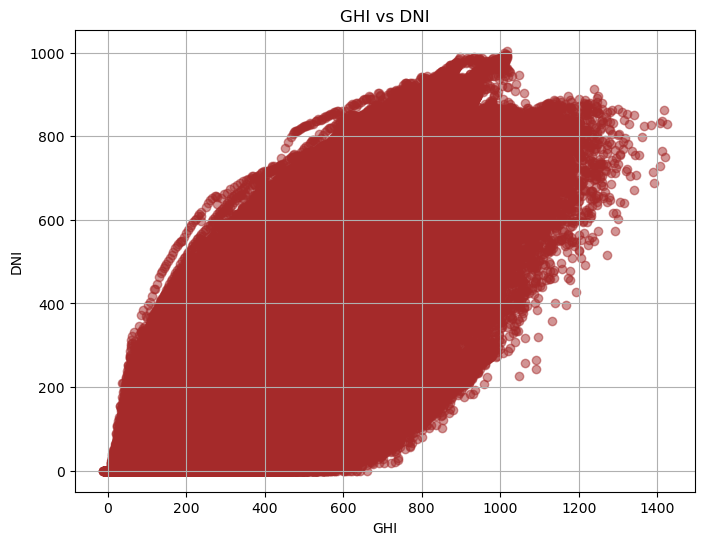

In [26]:

plt.figure(figsize=(8, 6))
plt.scatter(tog['GHI'], SB['DNI'], alpha=0.5, color='brown')
plt.title('GHI vs DNI')
plt.xlabel('GHI')
plt.ylabel('DNI')
plt.grid(True)
plt.show()

## Box Plot:Comparing the distribution of Global Horizontal Irradiance (GHI) for different Wind Speed categories.

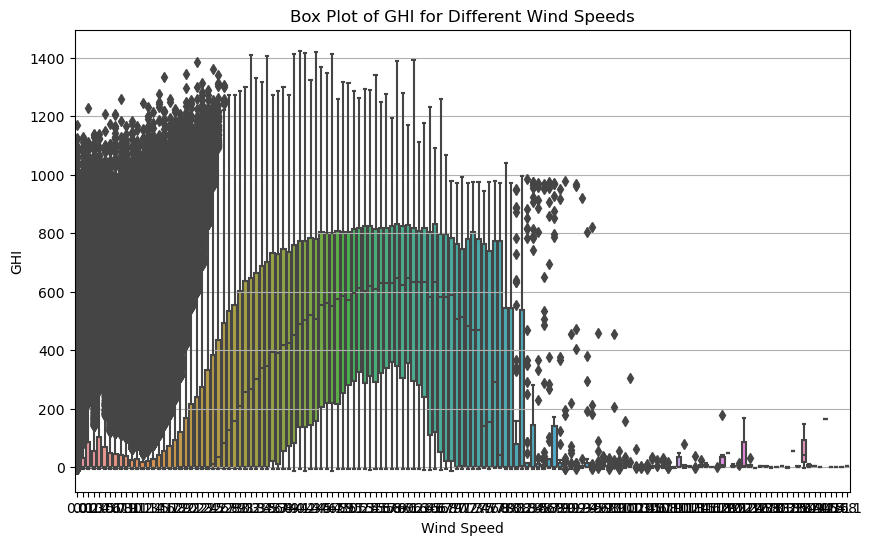

In [27]:


plt.figure(figsize=(10, 6))
sns.boxplot(x=tog['WS'], y=SB['GHI'])
plt.title('Box Plot of GHI for Different Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('GHI')
plt.grid(axis='y')
plt.show()
